In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


# Exploratory Data Analysis

In [3]:
df.shape

(119390, 32)

## Missing Values

In [4]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [5]:
df.country.value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [6]:
df['children'].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64



*   **Agent** and **Company** just have ID values. We might drop these two columns since they will not add value in our model building.
*  We will impute mode value to **Country** column. But Iam going to impute "Unknown", since it will retain more imformation.

*  Imputing mode value to **children**. It makes sense to impute 0 for null values.





In [7]:
df = df.drop(columns = ['agent', 'company'])

In [8]:
df['country'].fillna("Unknown" , inplace = True)

In [9]:
df['children'].fillna(df['children'].value_counts().index[0] , inplace = True)

In [10]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

## Irrelevant Data

If **adults**, **children**, **babies** are 0, it means there is no person for booking.

In [11]:
ind_to_drop = list(df[(df['children']==0) & (df['adults']==0) & (df['babies']==0)].index)

In [12]:
df = df.drop(ind_to_drop)

In [13]:
df.shape

(119210, 30)

## EDA

### Analysing the customer country wise 

In [14]:
df['country'].value_counts()/ df.shape[0]

PRT    0.406702
GBR    0.101669
FRA    0.087249
ESP    0.071806
DEU    0.061111
         ...   
DJI    0.000008
BWA    0.000008
HND    0.000008
VGB    0.000008
NAM    0.000008
Name: country, Length: 178, dtype: float64

In [15]:
country_data = df['country'].value_counts().reset_index()
country_data.columns = ['country', 'customers_count']

<AxesSubplot:xlabel='country', ylabel='customers_count'>

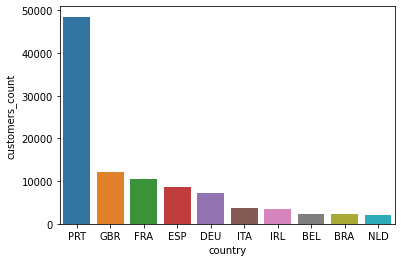

In [16]:
sns.barplot(data = country_data.iloc[:10, :], x = 'country', y = 'customers_count')

**Most of the customers in the dataset is from Portugal, then Great Britain, then France and so on...**

### Analysing if price is a major factor in cancellation for different months

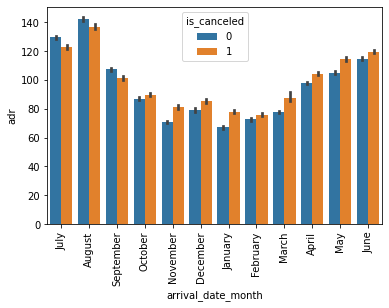

In [17]:
sns.barplot(x='arrival_date_month',y='adr',data=df ,hue='is_canceled')
plt.xticks(rotation='vertical')
plt.show()

**In months October, November, December, January, February, March, April, May, June. In these months price of cancelled booking is high which indicates price is a major factor in cancellation of booking**

### Analyse whether bookings were made only for weekdays or for weekends or for both.?

In [18]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [19]:
def week_function(row):
    feature1='stays_in_weekend_nights'
    feature2='stays_in_week_nights'
    
    if row[feature2]==0 and row[feature1] >0 :
        return 'stay_just_weekend'
    
    elif row[feature2]>0 and row[feature1] ==0 :
        return 'stay_just_weekdays'
    
    elif row[feature2]>0 and row[feature1] >0 :
        return 'stay_both_weekdays_weekends'
    
    else:
        return 'undefined_data'

In [20]:
df['weekend_or_weekday']=df.apply(week_function,axis=1)

In [21]:
df['weekend_or_weekday'].value_counts()

stay_both_weekdays_weekends    60388
stay_just_weekdays             51250
stay_just_weekend               6927
undefined_data                   645
Name: weekend_or_weekday, dtype: int64

In [22]:
group_data = df.groupby(['arrival_date_month','weekend_or_weekday']).size().unstack().reset_index()

In [23]:
group_data

weekend_or_weekday,arrival_date_month,stay_both_weekdays_weekends,stay_just_weekdays,stay_just_weekend,undefined_data
0,April,6024,4420,601,33
1,August,7945,5221,646,49
2,December,3128,3189,372,70
3,February,3669,3796,533,54
4,January,2339,3075,457,50
5,July,7437,4528,621,58
6,June,5395,4942,554,38
7,March,4705,4512,499,52
8,May,5719,5197,788,76
9,November,3177,3202,333,59


In [24]:
group_data.set_index('arrival_date_month',inplace=True)

<AxesSubplot:xlabel='arrival_date_month'>

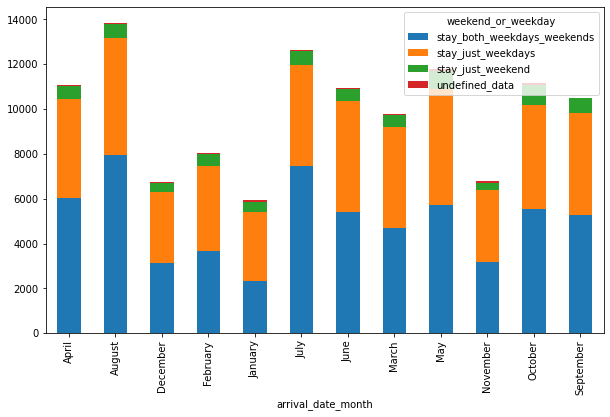

In [25]:
group_data.plot(kind='bar',stacked=True,figsize=(10,6))

**Most of the customers stays for both weekdays and weekends. Very few people booked hotels only for weekends**

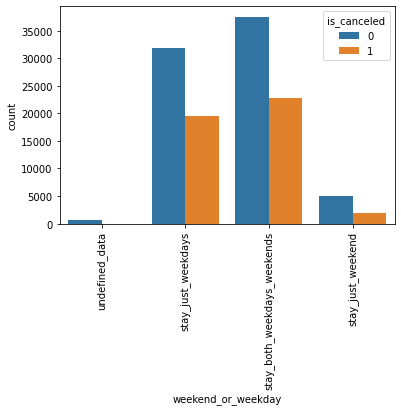

In [26]:
sns.countplot(data = df, x = 'weekend_or_weekday', hue = 'is_canceled')
plt.xticks(rotation='vertical')
plt.show()

**More bookings are cancelled in category "stay_just_weekend" when compared to non cancelled bookings.**

# Feature engineering

In [27]:
def family(row):
    if (row['adults']>0) &  (row['children']>0 or row['babies']>0) :
        return 1
    else:
        return 0

In [28]:
df['is_family']=df.apply(family,axis=1)

In [29]:
df['total_customer'] = df['adults'] + df['babies'] + df['children']

In [30]:
df['total_nights'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']

In [31]:
df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,weekend_or_weekday,is_family,total_customer,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,7/1/2015,undefined_data,0,2.0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,7/1/2015,undefined_data,0,2.0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,7/2/2015,stay_just_weekdays,0,1.0,1


In [32]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'weekend_or_weekday',
       'is_family', 'total_customer', 'total_nights'],
      dtype='object')

In [33]:
df.drop(columns=['adults', 'children', 'babies', 'stays_in_week_nights', 'stays_in_weekend_nights'],axis=1,inplace=True)

# Encoding

In [34]:
df.shape

(119210, 29)

In [35]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
days_in_waiting_list                int64
customer_type                      object
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests           int64
reservation_status                

In [36]:
cat_features=[col for col in df.columns if df[col].dtype=='object']
num_features=[col for col in df.columns if df[col].dtype!='object']

## mean encoding

In [37]:
cat_features

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date',
 'weekend_or_weekday']

In [38]:
cat_df = df[cat_features]
num_df = df[num_features]

In [39]:
df.groupby(['hotel'])['is_canceled'].mean()

hotel
City Hotel      0.417859
Resort Hotel    0.277674
Name: is_canceled, dtype: float64

In [40]:
df[df['hotel'] == 'City Hotel']['is_canceled'].mean()

0.4178593534858457

In [41]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [42]:
cat_df['cancellation'] = df['is_canceled']

In [43]:
cat_df.columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date', 'weekend_or_weekday', 'cancellation'],
      dtype='object')

In [44]:
# Perform Mean Encoding Technique 

for col in cat_df.columns[:-1]:
    d = cat_df.groupby([col])['cancellation'].mean().to_dict()
    cat_df[col] = cat_df[col].map(d)

In [45]:
cat_df.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,weekend_or_weekday,cancellation
0,0.277674,0.374644,0.374106,0.567333,0.153712,0.174868,0.330827,0.188186,0.28402,0.407864,0.0,0.800000,0.035659,0
1,0.277674,0.374644,0.374106,0.567333,0.153712,0.174868,0.330827,0.188186,0.28402,0.407864,0.0,0.800000,0.035659,0
2,0.277674,0.374644,0.374106,0.202310,0.153712,0.174868,0.391567,0.188186,0.28402,0.407864,0.0,0.985075,0.379746,0
3,0.277674,0.374644,0.374106,0.202310,0.187618,0.220568,0.391567,0.445055,0.28402,0.407864,0.0,0.985075,0.379746,0
4,0.277674,0.374644,0.374106,0.202310,0.367590,0.410598,0.391567,0.445055,0.28402,0.407864,0.0,0.522876,0.379746,0


## num features

In [46]:
num_df.columns

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'is_family', 'total_customer',
       'total_nights'],
      dtype='object')

In [47]:
def plot_boxplot(df,cols):

    n_rows, n_cols = (len(cols) // 3) , 3
    figure, axis = plt.subplots(n_rows, n_cols, figsize = (20,20))
    
    i = 0
    for col in cols:
        if col != 'is_canceled':
            j = i//n_cols
            k = i%n_cols
            sns.boxplot(data  = df , y=col, x='is_canceled', ax=axis[j,k])
            i +=1

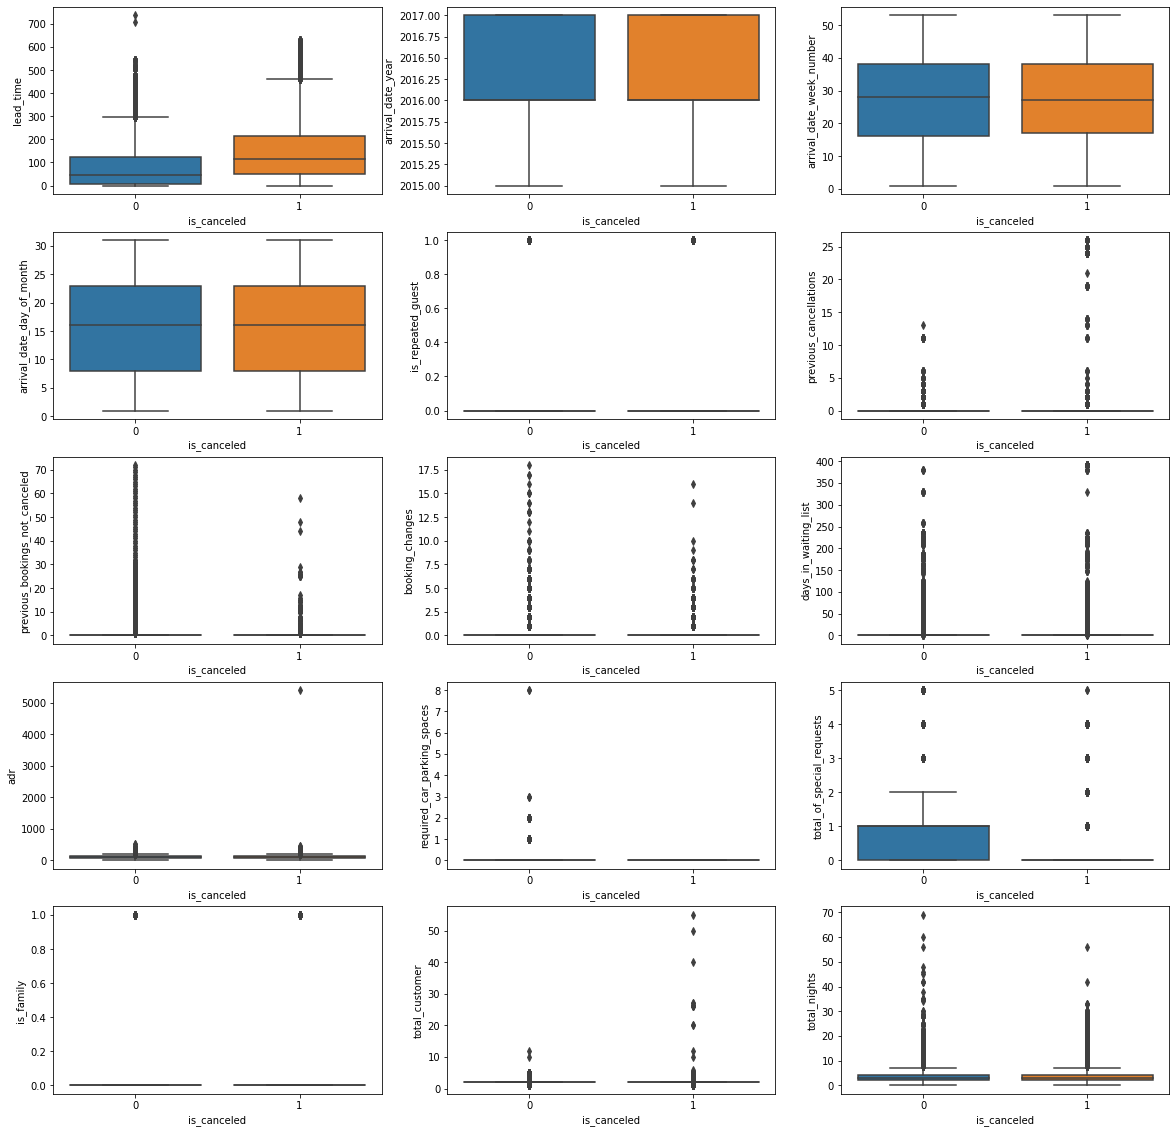

In [48]:
plot_boxplot(num_df, list(num_df.columns))

In [49]:
def plot_kdeplot(df,cols):

    n_rows, n_cols = (len(cols) // 3) , 3
    figure, axis = plt.subplots(n_rows, n_cols, figsize = (20,20))
    
    i = 0
    for col in cols:
        if col != 'is_canceled':
            j = i//n_cols
            k = i%n_cols
            sns.kdeplot(data  = df , x = col, hue ='is_canceled', ax=axis[j,k],
                        fill=True, common_norm=False,
                        alpha=.5, linewidth=0)
            i +=1

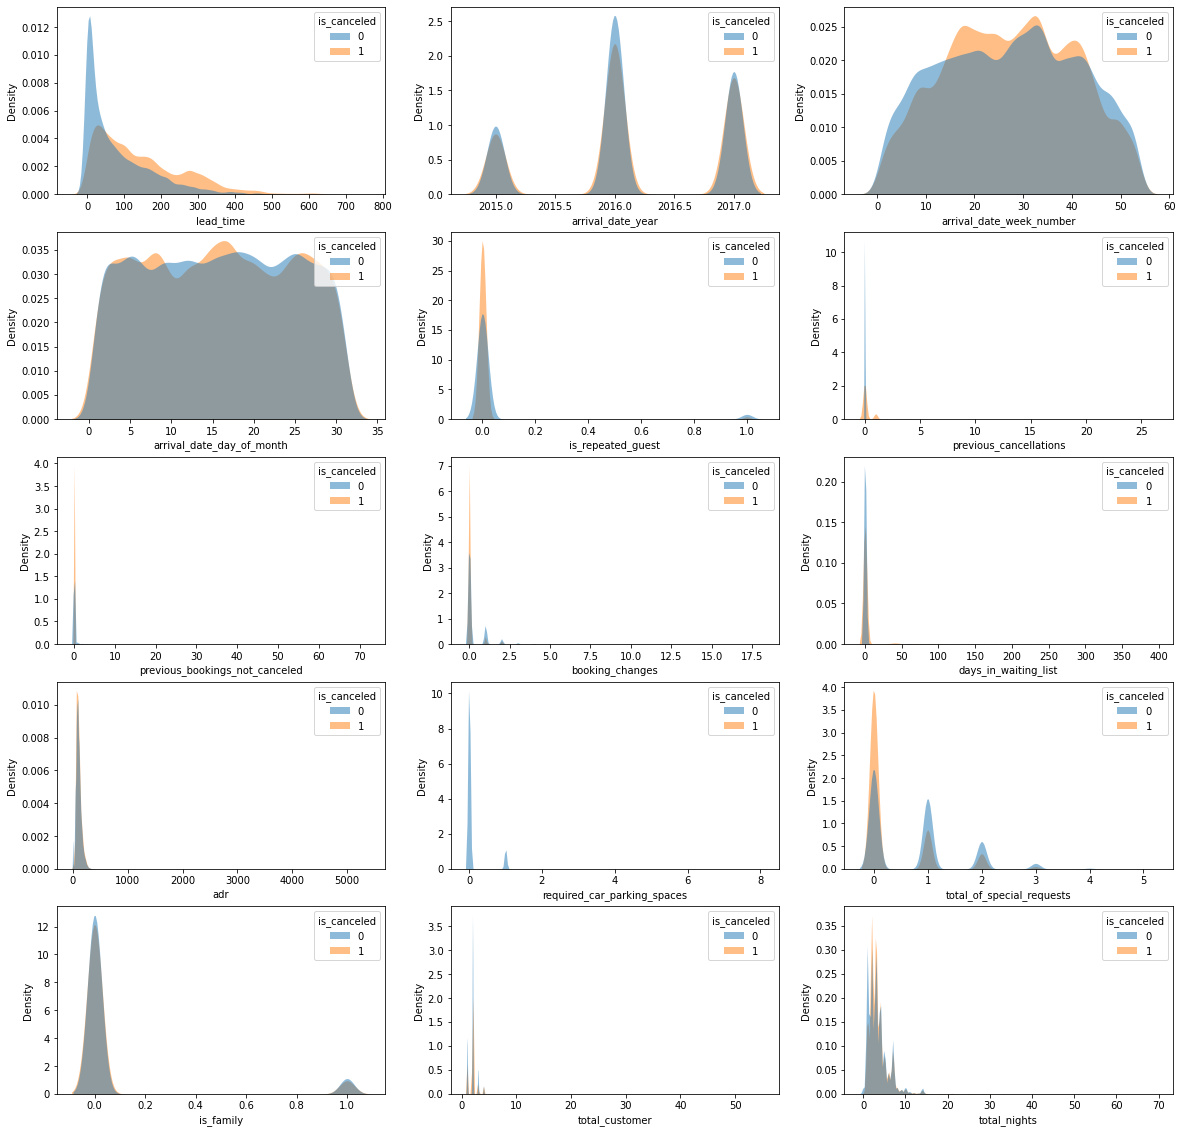

In [50]:
plot_kdeplot(num_df, list(num_df.columns)) 

In [51]:
cols_not_to_transform = ['arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'is_canceled']

In [52]:
def log_transform(df,cols):
    cols_not_to_transform = ['arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'is_canceled']
    new_df = pd.DataFrame()

    for col in cols:
        if col not in cols_not_to_transform:
            new_df[col] = np.log1p(df[col])

    return new_df

In [53]:
num_df_transformed = log_transform(num_df, list(num_df.columns))

In [54]:
num_df_transformed['is_canceled'] = num_df['is_canceled']

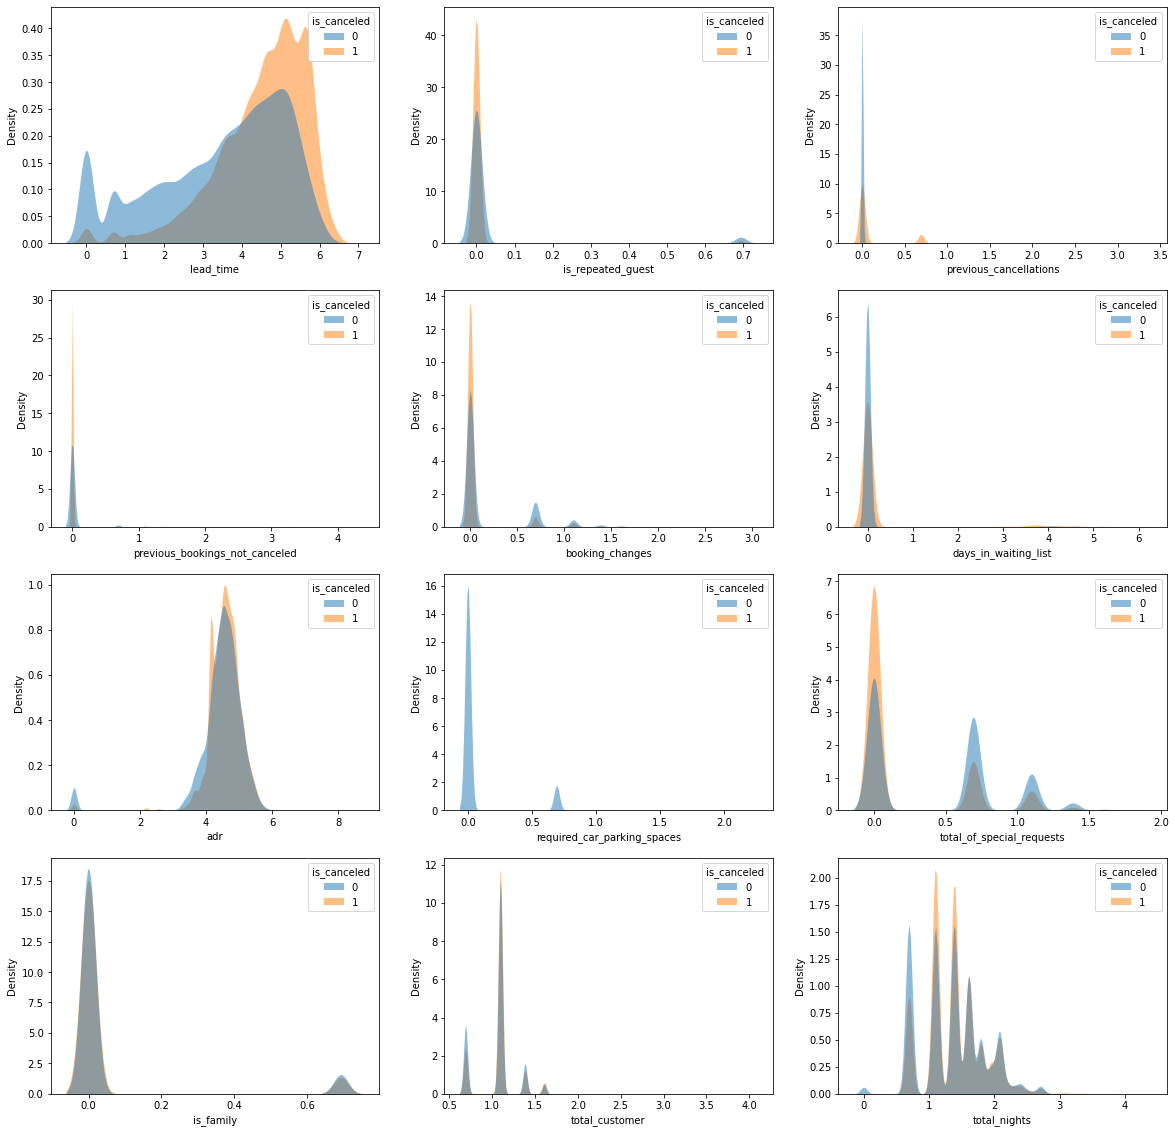

In [55]:
plot_kdeplot(num_df_transformed, list(num_df_transformed.columns))

# Feature Selection

In [57]:
final_df = pd.concat([cat_df, num_df_transformed], axis = 1)

In [58]:
corr = final_df.corr()

In [59]:
corr['is_canceled'].sort_values(ascending=False)

cancellation                      1.000000
reservation_status                1.000000
is_canceled                       1.000000
reservation_status_date           0.488307
deposit_type                      0.481530
country                           0.361983
lead_time                         0.320075
market_segment                    0.267006
previous_cancellations            0.229243
assigned_room_type                0.201570
distribution_channel              0.177167
hotel                             0.137082
customer_type                     0.136617
days_in_waiting_list              0.090158
adr                               0.081660
weekend_or_weekday                0.073162
reserved_room_type                0.072769
arrival_date_month                0.069886
total_customer                    0.055446
meal                              0.050584
total_nights                      0.045023
is_family                        -0.013226
is_repeated_guest                -0.083745
previous_bo

In [60]:
final_df.drop(columns = ['cancellation', 'reservation_status', 'total_nights', 'is_family'], inplace = True)

In [61]:
final_df.shape

(119210, 23)

# Check Imbalance

[62.9234124653972, 37.0765875346028]


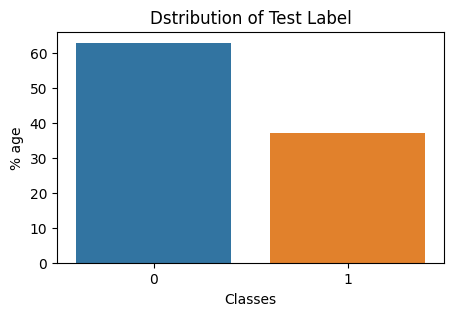

In [62]:
vc = final_df['is_canceled'].value_counts()
x_axis = [0,1]
y_axis = [(vc[0] / (vc[0] + vc[1] ))*100 , (vc[1] / (vc[0] + vc[1] ))*100]

print(y_axis)

plt.style.use("default")
plt.figure(figsize = (5,3))
plt.title("Dstribution of Test Label")
plt.xlabel("Classes")
plt.ylabel("% age")
sns.barplot(x = x_axis , y = y_axis)
plt.show()

In [66]:
final_df.isnull().sum()

hotel                             0
arrival_date_month                0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
reserved_room_type                0
assigned_room_type                0
deposit_type                      0
customer_type                     0
reservation_status_date           0
weekend_or_weekday                0
lead_time                         0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
adr                               1
required_car_parking_spaces       0
total_of_special_requests         0
total_customer                    0
is_canceled                       0
dtype: int64

In [67]:
final_df.dropna(inplace = True)

In [68]:
X_df = final_df.drop(columns = ['is_canceled'])
y_df = final_df['is_canceled']

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.33)

In [72]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X_train , y_train)

In [73]:
y.value_counts()

1    50376
0    50376
Name: is_canceled, dtype: int64

# Model Building

In [76]:
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import xgboost
from xgboost import XGBClassifier

from sklearn.metrics import f1_score

classifiers = [
                ('Logistic', SGDClassifier(loss = 'log')),
                ('SVM', SGDClassifier(loss = 'hinge')),
                ('Naive Bayes', MultinomialNB()),
                ('DT', DecisionTreeClassifier()),
                ('Random Forest', RandomForestClassifier()),
                ('XGBoost', XGBClassifier()),
]

In [78]:
performance = []
for name, clf in classifiers:
    clf.fit(X, y)
    y_pred = clf.predict(X_test)
    perf_tuple = (name, f1_score(y_test , y_pred))
    #print(perf_tuple)
    performance.append(perf_tuple)

In [79]:
performance

[('Logistic', 0.7786633155858329),
 ('SVM', 0.727940582869137),
 ('Naive Bayes', 0.6703942201978954),
 ('DT', 0.8201846482018466),
 ('Random Forest', 0.8716998286533553),
 ('XGBoost', 0.8161203945361488)]

## Hyper-parameter Tuning

In [80]:
from sklearn.model_selection import GridSearchCV

param = {'max_depth' : [2,4,6,8],
         'n_estimators': [50, 100, 150, 200]}

grid = GridSearchCV( RandomForestClassifier() , 
                     param_grid = param,
                     cv = 3,
                     scoring = 'f1',
                     n_jobs = -1,
                     return_train_score = True)

grid.fit(X, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8],
                         'n_estimators': [50, 100, 150, 200]},
             return_train_score=True, scoring='f1')

In [81]:
grid_output = pd.DataFrame()
grid_results = grid.cv_results_

grid_output['max_depth'] = np.array(grid_results['param_max_depth'])
grid_output['n_estimators'] = np.array( grid_results['param_n_estimators'])
grid_output['cv_score'] = np.array(grid_results['mean_test_score'])
grid_output['train_score'] = np.array(grid_results['mean_train_score'])

<AxesSubplot:xlabel='max_depth', ylabel='n_estimators'>

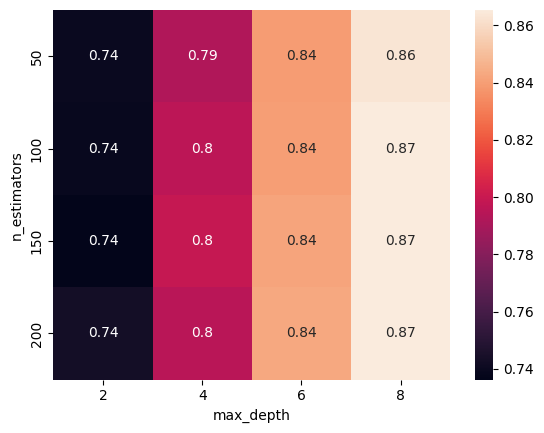

In [82]:
df_train = grid_output.pivot("n_estimators", "max_depth", "train_score")
sns.heatmap(df_train, annot = True)

<AxesSubplot:xlabel='max_depth', ylabel='n_estimators'>

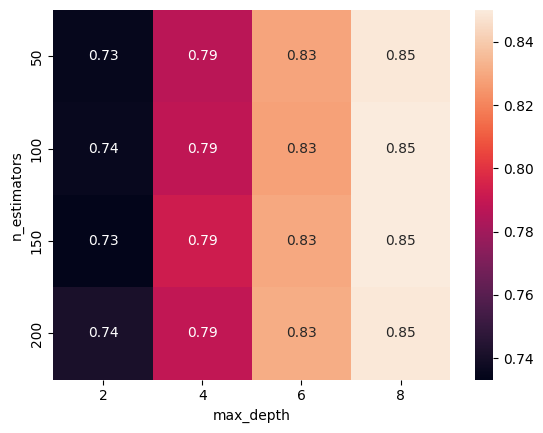

In [83]:
df_cv = grid_output.pivot("n_estimators", "max_depth", "cv_score")
sns.heatmap(df_cv, annot = True)

In [88]:
best_model = RandomForestClassifier()
best_model.fit(X,y)

RandomForestClassifier()

In [89]:
y_pred = best_model.predict(X_test)
print(f1_score(y_test , y_pred))

0.8717590327765742
